In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
rawData = pd.read_csv("offset.csv")
normal = rawData['normal']
abnormal = rawData['abnormal']

In [7]:
mean = np.mean(normal)
median = np.median(normal)
mode = stats.mode(normal)

print("평균값 : ", mean)
print("중앙값 : ", median)
print(f"최빈값 :  {mode[0][0]} ( {mode[1][0]} )")

평균값 :  0.27805031232773114
중앙값 :  0.264775192
<class 'numpy.float64'> <class 'numpy.int32'>
최빈값 :  0.091218436 ( 3 )


In [8]:
mean = np.mean(abnormal)
median = np.median(abnormal)
mode = stats.mode(abnormal)

print("평균값 : ", mean)
print("중앙값 : ", median)
print(f"최빈값 :  {mode[0][0]} ( {mode[1][0]} )")

평균값 :  0.42735757162711846
중앙값 :  nan
최빈값 :  0.264811967 ( 3 )


In [9]:
A_Q1 = normal.quantile(0.25) 
print("1사분위수 : ", A_Q1)
A_Q2 = normal.quantile(0.50)
print("2사분위수(중앙값) : ", A_Q2)
A_Q3 = normal.quantile(0.75)
print("3사분위수 : ", A_Q3)
A_Q4 = normal.quantile(1)
print("4사분위수 : ", A_Q4,"\n")

B_Q1 = abnormal.quantile(0.25)
print("1사분위수 : ", B_Q1)
B_Q2 = abnormal.quantile(0.50)
print("2사분위수(중앙값) : ", B_Q2)
B_Q3 = abnormal.quantile(0.75)
print("3사분위수 : ", B_Q3)
B_Q4 = abnormal.quantile(1)
print("4사분위수 : ", B_Q4,"\n")

1사분위수 :  0.165170703
2사분위수(중앙값) :  0.264775192
3사분위수 :  0.364382903
4사분위수 :  0.6425872020000001 

1사분위수 :  0.2657626735
2사분위수(중앙값) :  0.407574837
3사분위수 :  0.608895856
4사분위수 :  0.9051673790000001 



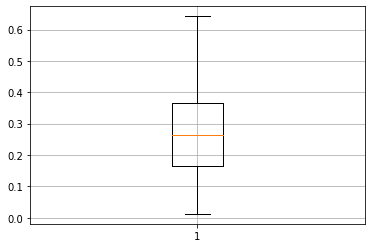

C:\Users\xoxwg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\xoxwg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\xoxwg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\xoxwg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


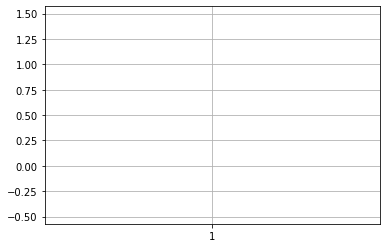

In [11]:
plt.boxplot((normal))
plt.grid()
plt.show()

plt.boxplot((abnormal))
plt.grid()
plt.show()

In [12]:
IQR_b = B_Q3-B_Q1 # 사분범위 계산
print("IQR : ", IQR_b)
STEP1_b = IQR_b * 1.5 # 사분범위에 1.5를 곱한다
print("STEP1_b : ", STEP1_b)

IQR_a = A_Q3-A_Q1 # 사분범위 계산
print("IQR : ", IQR_a)
STEP1_a = IQR_a * 1.5 # 사분범위에 1.5를 곱한다
print("STEP1 : ", STEP1_a)

IQR :  0.34313318249999997
STEP1_b :  0.51469977375
IQR :  0.19921219999999998
STEP1 :  0.2988183


In [13]:
Lower_fence_b = B_Q1 - STEP1_b # 하단 이상치 기준선은 1사분위수에서 사분범위의 1.5배값을 빼준다.
print(Lower_fence_b) # 이 값보다 작으면 이상치로 간주

Lower_fence_a = A_Q1 - STEP1_a # 하단 이상치 기준선은 1사분위수에서 사분범위의 1.5배값을 빼준다.
print(Lower_fence_a) # 이 값보다 작으면 이상치로 간주

-0.24893710025
-0.13364759699999998


In [14]:
Upper_fence_b = B_Q3 + STEP1_b # 상단 이상치. 3사분위수 더하기 1.5배값
print(Upper_fence_b) # 이값보다 크면 이상치.

Upper_fence_a = B_Q3 + STEP1_a # 상단 이상치. 3사분위수 더하기 1.5배값
print(Upper_fence_a) # 이값보다 크면 이상치.

1.12359562975
0.9077141559999999


In [18]:
for index, i in enumerate(normal):
  if (i > Upper_fence_a or i < Lower_fence_a):
    del normal[index]

for index, i in enumerate(abnormal):
  if (i > Upper_fence_b or i < Lower_fence_b):
    del abnormal[index]

# print(normal, abnormal)
print(np.mean(normal), np.mean(abnormal))
print(max(normal), min(abnormal))
print(min(normal), max(abnormal))

0.27805031232773114 0.42735757162711846
0.6425872020000001 0.024581142
0.011977602 0.9051673790000001


In [34]:
num = 0.3
while(num < 0.7):
    cnt_a = 0
    
    for i in normal:
        if (i < num):
            cnt_a += 1
    print(cnt_a, cnt_a/120*100,"%")
    cnt_b = 0
    for i in abnormal:
        if (i > num):
            cnt_b += 1
    print(cnt_b, cnt_b/60*100,"%")
    num += 0.01
    print("avg : ", (cnt_a/120*100+cnt_b/60*100)/2, "%")
    print("------",num,"----------")


67 55.833333333333336 %
38 63.33333333333333 %
avg :  59.58333333333333 %
------ 0.31 ----------
72 60.0 %
37 61.66666666666667 %
avg :  60.833333333333336 %
------ 0.32 ----------
75 62.5 %
37 61.66666666666667 %
avg :  62.083333333333336 %
------ 0.33 ----------
81 67.5 %
35 58.333333333333336 %
avg :  62.91666666666667 %
------ 0.34 ----------
82 68.33333333333333 %
35 58.333333333333336 %
avg :  63.33333333333333 %
------ 0.35000000000000003 ----------
85 70.83333333333334 %
35 58.333333333333336 %
avg :  64.58333333333334 %
------ 0.36000000000000004 ----------
87 72.5 %
35 58.333333333333336 %
avg :  65.41666666666667 %
------ 0.37000000000000005 ----------
90 75.0 %
35 58.333333333333336 %
avg :  66.66666666666667 %
------ 0.38000000000000006 ----------
93 77.5 %
35 58.333333333333336 %
avg :  67.91666666666667 %
------ 0.39000000000000007 ----------
96 80.0 %
35 58.333333333333336 %
avg :  69.16666666666667 %
------ 0.4000000000000001 ----------
96 80.0 %
35 58.333333333333336 

C:\Users\xoxwg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\xoxwg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\xoxwg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\xoxwg\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


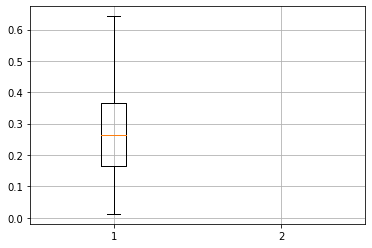

In [16]:
plt.boxplot((normal, abnormal))
plt.grid()
plt.show()